In [3]:
import os
vipshome = r'C:\Users\Kevin\Downloads\vips-dev-8.14\bin'
os.environ['PATH'] = vipshome + ';' + os.environ['PATH']
import pyvips
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [4]:
src = r'\\shelter\Kyu\unstain2stain\unstain2stain_tile\cyclegan\test\HE\OTS_14684_3_he'
tiles = [_ for _ in os.listdir(src) if _.endswith('png')]

In [5]:
tilesarr = []
for tile in tiles:
    tilesarr.append(np.array(Image.open(os.path.join(src,tile))))

In [36]:
bigtile = np.zeros((2,2,1024,1024,3))

In [38]:
tilesarr[0].shape

(1024, 1024, 3)

In [39]:
bigtile[0,0,:,:,:]=tilesarr[0]
bigtile[0,1,:,:,:]=tilesarr[1]
bigtile[1,0,:,:,:]=tilesarr[2]
bigtile[1,1,:,:,:]=tilesarr[3]

In [41]:
bigtile.shape

(2, 2, 1024, 1024, 3)

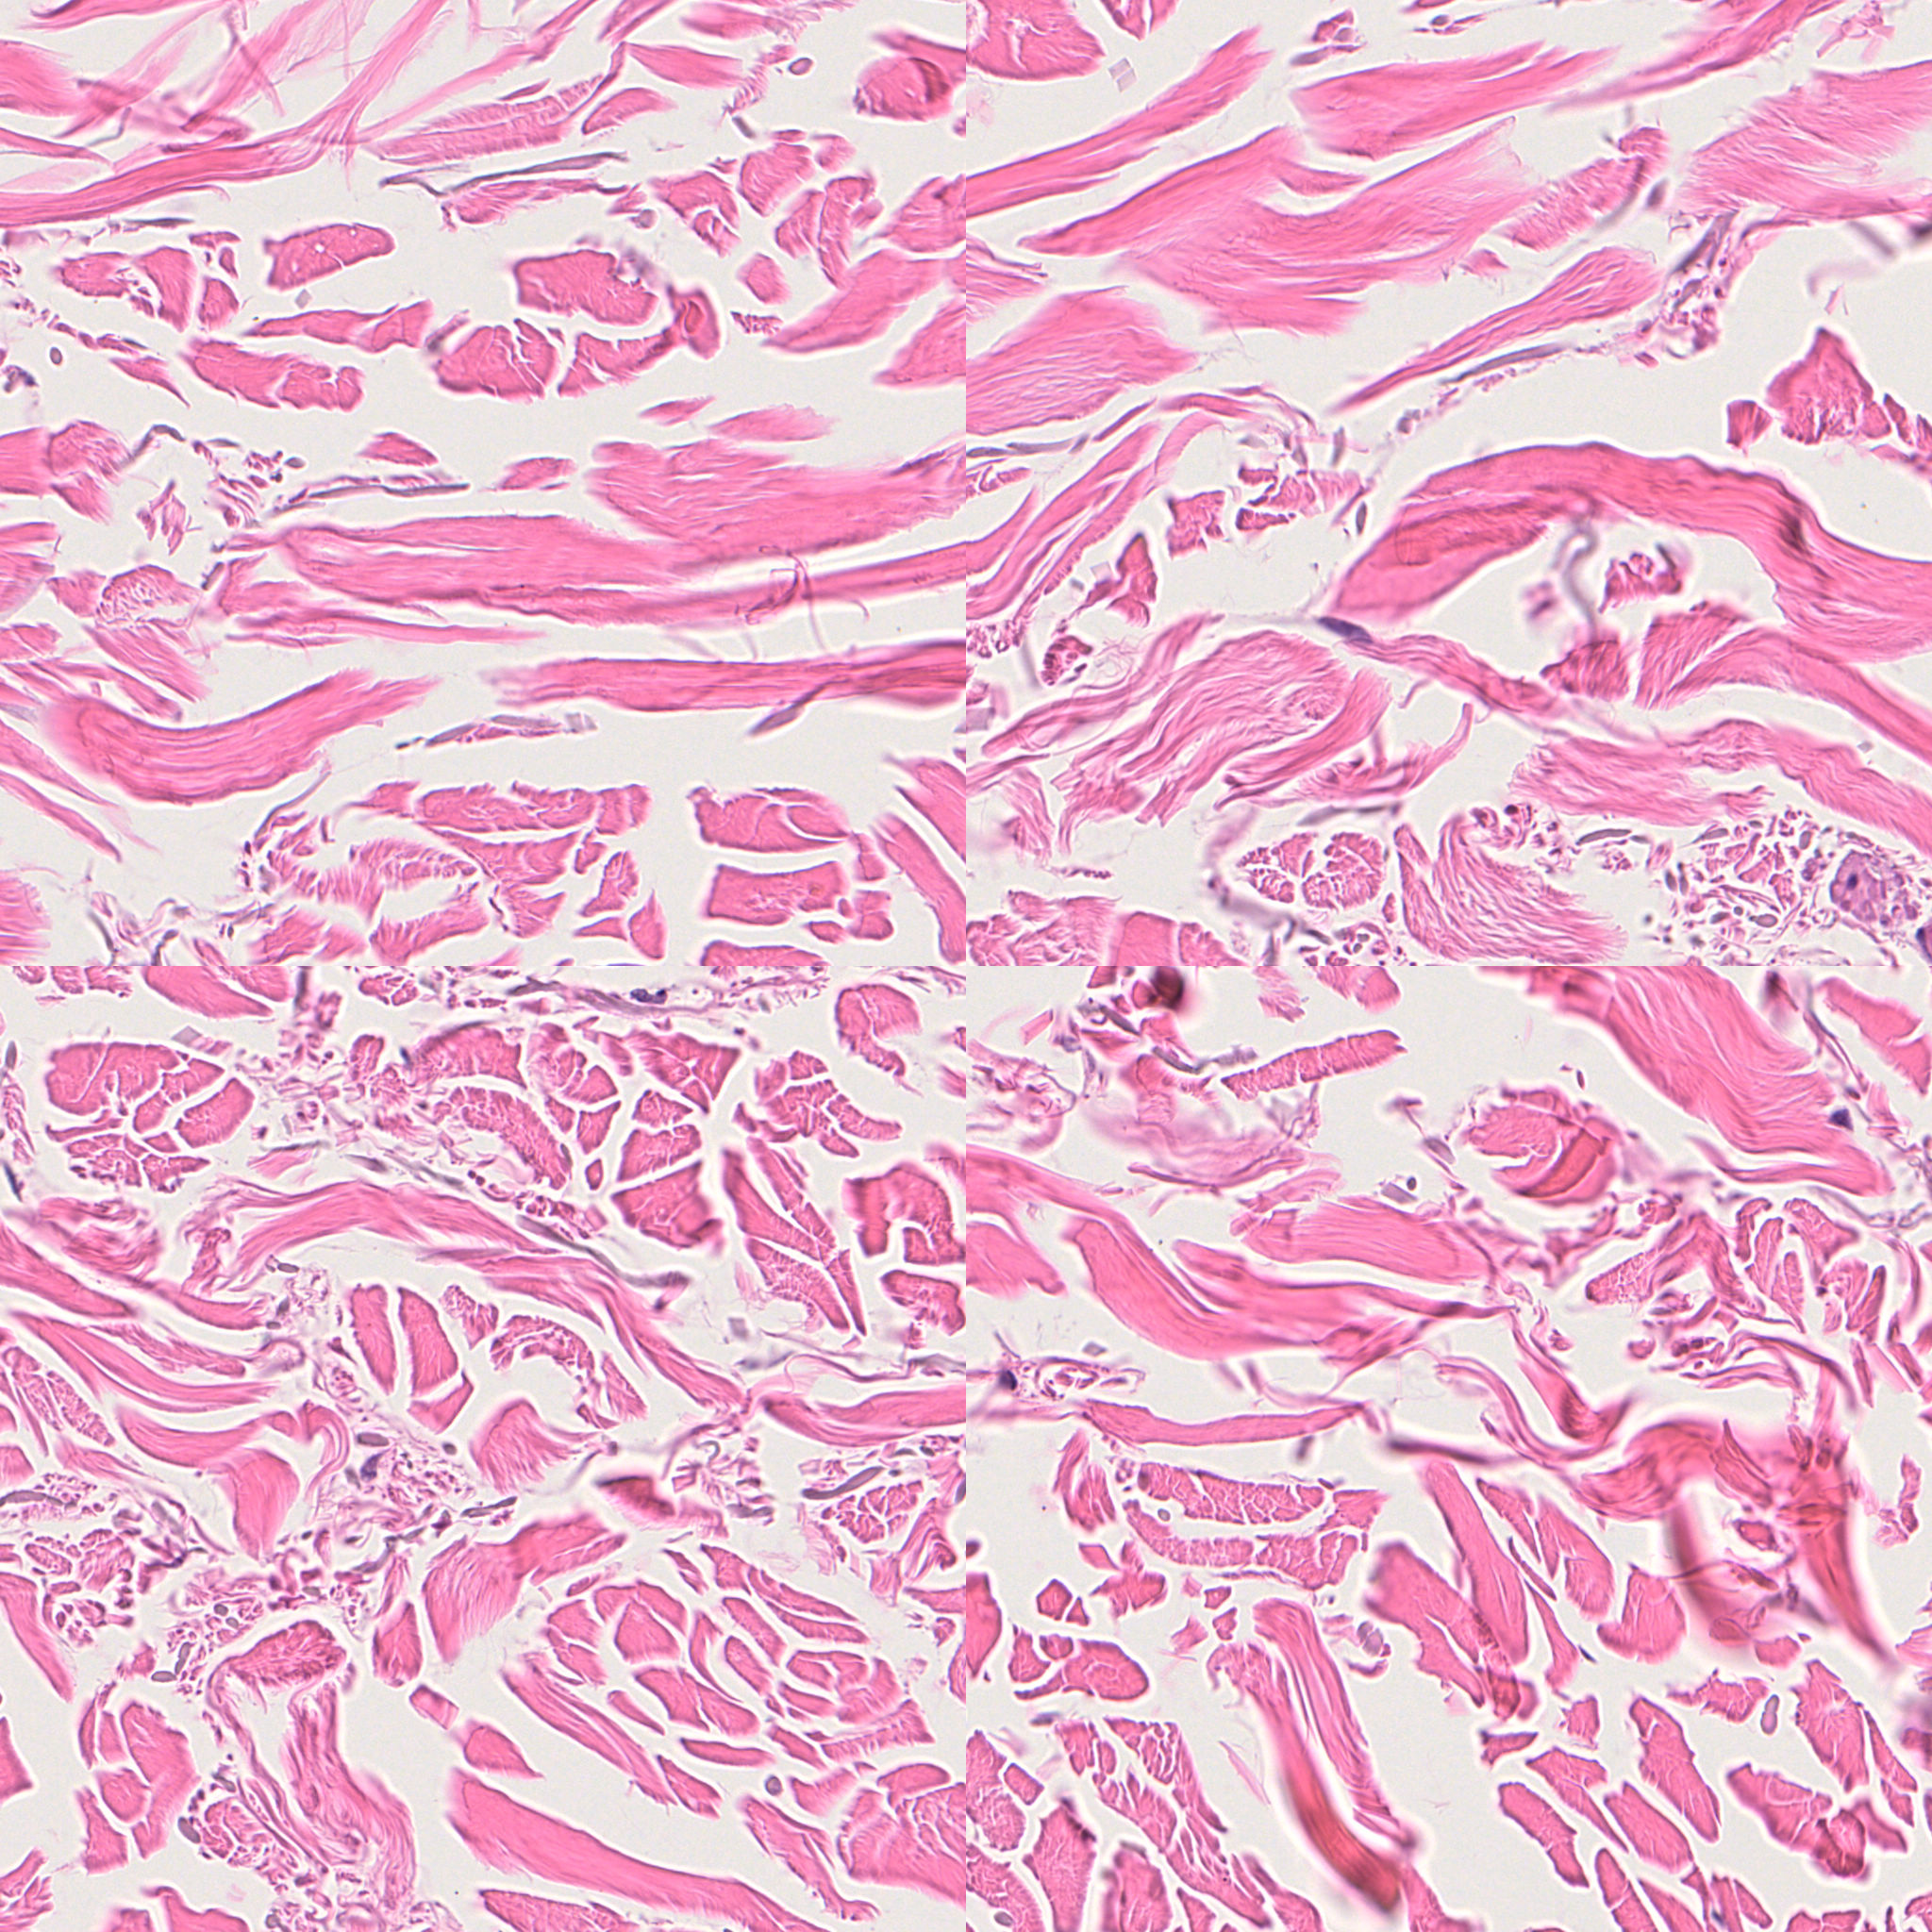

In [44]:
bigtile2 = np.reshape(bigtile.astype('uint8').swapaxes(1,2),(2048,2048,3))
Image.fromarray(bigtile2)

In [45]:
im = pyvips.Image.new_from_array(bigtile2)
im = im.copy()
image_height = im.height
image_bands = im.bands
im.set_type(pyvips.GValue.gint_type, "page-height", image_height)
im.set_type(pyvips.GValue.gstr_type, "image-description",
            f"""<?xml version="1.0" encoding="UTF-8"?>
<OME xmlns="http://www.openmicroscopy.org/Schemas/OME/2016-06"
    xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
    xsi:schemaLocation="http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd">
    <Image ID="Image:0">
        <!-- Minimum required fields about image dimensions -->
        <Pixels DimensionOrder="XYCZT"
                ID="Pixels:0"
                SizeC="{image_bands}"
                SizeT="1"
                SizeX="{im.width}"
                SizeY="{image_height}"
                SizeZ="1"
                Type="uint8">
        </Pixels>
    </Image>
</OME>""")

im.tiffsave(os.path.join(src,'temp.ome.tiff'), compression="jpeg", tile=True,tile_width=512, tile_height=512,pyramid=True, subifd=True)